In [ ]:
#Sentiment Analysis on Twitter Data

In [9]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import re

In [19]:
# Step 1: Load the Datasets
train_df = pd.read_csv("/content/twitter_training.csv", header=None, names=["id", "entity", "sentiment", "text"])
valid_df = pd.read_csv("/content/twitter_validation.csv", header=None, names=["id", "entity", "sentiment", "text"])


In [20]:
print("Training Data Shape:", train_df.shape)
print("Validation Data Shape:", valid_df.shape)
print("\nSample Training Data:\n", train_df.head())

Training Data Shape: (74682, 4)
Validation Data Shape: (1000, 4)

Sample Training Data:
      id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [11]:
# Step 2: Data Cleaning
# Handle missing values
train_df["text"] = train_df["text"].fillna("")
valid_df["text"] = valid_df["text"].fillna("")

# Cleaning function: remove URLs, mentions, hashtags, numbers, punctuation
def clean_text(text):
    text = re.sub(r"http\S+", "", text)       # remove URLs
    text = re.sub(r"@\w+", "", text)          # remove mentions
    text = re.sub(r"#", "", text)             # remove hashtags
    text = re.sub(r"[^a-zA-Z\s]", "", text)   # keep only letters
    return text.lower().strip()

train_df["clean_text"] = train_df["text"].apply(clean_text)
valid_df["clean_text"] = valid_df["text"].apply(clean_text)




In [12]:
# Map sentiments to numeric labels
sentiment_map = {"Positive": 1, "Negative": 0, "Neutral": 2, "Irrelevant": 3}
train_df["label"] = train_df["sentiment"].map(sentiment_map)
valid_df["label"] = valid_df["sentiment"].map(sentiment_map)


In [13]:
# Drop any rows with unmapped labels (just in case)
train_df = train_df.dropna(subset=["label"]).reset_index(drop=True)
valid_df = valid_df.dropna(subset=["label"]).reset_index(drop=True)

In [14]:
# Step 3: Feature Extraction
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)

X_train = vectorizer.fit_transform(train_df["clean_text"])
y_train = train_df["label"].astype(int)

X_valid = vectorizer.transform(valid_df["clean_text"])
y_valid = valid_df["label"].astype(int)

In [ ]:
# Step 4: Train Model
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

In [15]:
# Step 5: Evaluate Model
y_pred = clf.predict(X_valid)

print("\n Model Accuracy:", round(accuracy_score(y_valid, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_valid, y_pred, target_names=sentiment_map.keys()))


 Model Accuracy: 0.797

Classification Report:
               precision    recall  f1-score   support

    Positive       0.75      0.88      0.81       266
    Negative       0.82      0.84      0.83       277
     Neutral       0.85      0.76      0.80       285
  Irrelevant       0.77      0.65      0.71       172

    accuracy                           0.80      1000
   macro avg       0.80      0.78      0.79      1000
weighted avg       0.80      0.80      0.80      1000



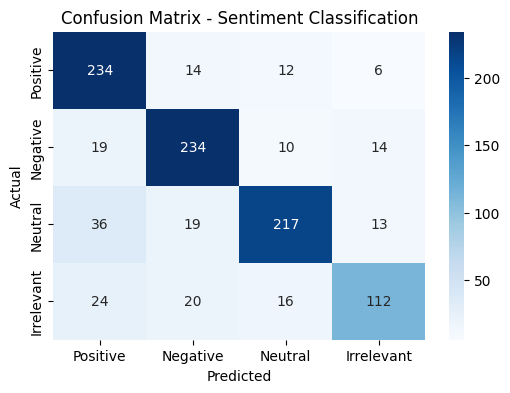

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=sentiment_map.keys(),
            yticklabels=sentiment_map.keys())
plt.title("Confusion Matrix - Sentiment Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-70623664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=train_df,


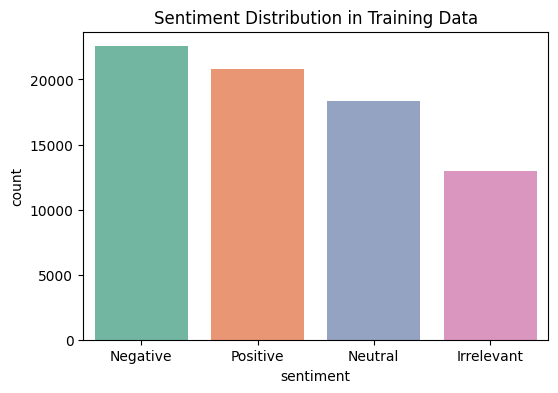

In [17]:
# Step 6: Sentiment Distribution Visualization
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=train_df,
              order=train_df["sentiment"].value_counts().index,
              palette="Set2")
plt.title("Sentiment Distribution in Training Data")
plt.show()

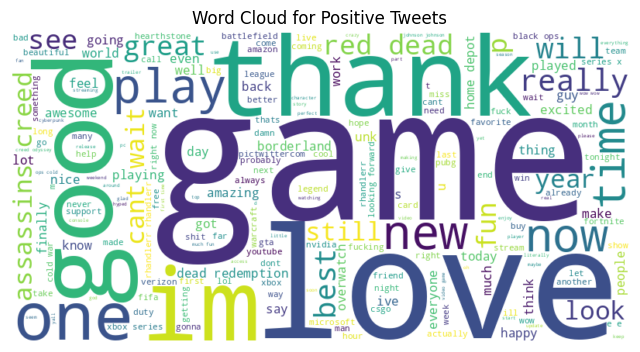

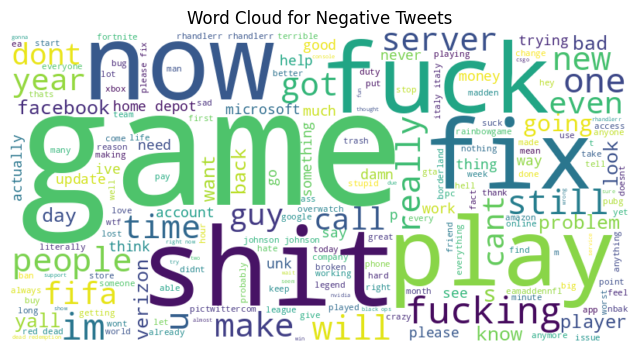

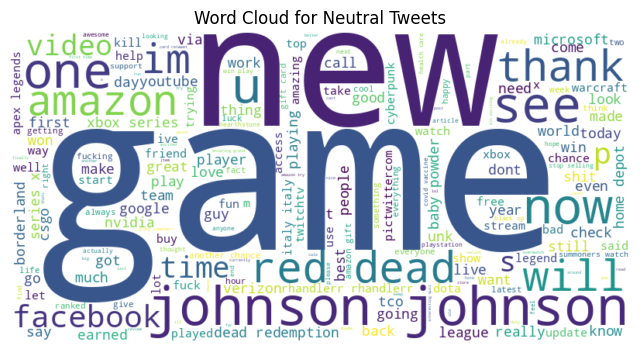

In [18]:
# Step 7: Word Clouds for Each Sentiment

for sentiment in ["Positive", "Negative", "Neutral"]:
    text_data = " ".join(train_df[train_df["sentiment"] == sentiment]["clean_text"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

    plt.figure(figsize=(8,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()
